Zweck dieses Notebooks: Es wurden Versuche für zwei Operationsmethoden durchgeführt. Das Experiment wurde 13 mal wiederholt und die Versuchsmethoden sollen nun miteinander verglichen werden. Es soll untersucht werden, welche Operationsmethode näher an den Ursprungswert kommt.


In [ ]:
## Import der Daten
library(readxl)
grad_data=read_excel('/content/Gessamtauwertung Gradient M01-M13.xlsx')
head(grad_data)

New names:
• `` -> `...1`
• `` -> `...9`


...1,Mitteleres V- Systole (ml),V-Stroke (ml),V-Leak (ml),Gradient (mmHg),Gradient % von Nativ,Leak % von Nativ,Kontrolle,...9
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
M01N02,-19.82809,-8.431913,-11.39618,2.118782,1.0000000,1.000000,0,NA
M01CR02,-51.13753,0.000000,-51.13753,2.241235,1.0577941,4.487252,0,NA
M01M02C01,-25.41917,-10.272913,-15.14625,7.823207,3.6923133,1.329064,0,NA
M01CL02,-19.70211,-7.974607,-11.72750,3.597738,1.6980217,1.029073,0,NA
M02N01,-17.07347,-10.025333,-7.04814,2.641436,1.0000000,1.000000,0,NA
M02CR,-32.74327,-17.938140,-14.80513,2.616178,0.9904378,2.100572,0,NA


In [ ]:
## Entfernen der Werte 38 bis 42, da diese zuerst nicht für den Versuch verwendet werden sollen
grad_data1 <- grad_data[-(38:42),]
nrow(grad_data1) ## Alte Länge 53, neue Länge 53-5 = 48

[1] 48

In [ ]:
## Nummerierung der Reihen von 1 bis 4 für weitere Zuweisung(RowNumber1)
## Nummerierung erfolgt, um die Nummern 1 bis 4 den Versuchsstadien zuzuordnen
grad_data1 <- cbind(RowNumber1 = 1:4, grad_data1)
class(grad_data1)
head(grad_data1,n=8)

[1] "data.frame"

,RowNumber1,...1,Mitteleres V- Systole (ml),V-Stroke (ml),V-Leak (ml),Gradient (mmHg),Gradient % von Nativ,Leak % von Nativ,Kontrolle,...9
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,M01N02,-19.82809,-8.431913,-11.396180,2.118782,1.0000000,1.0000000,0,NA
2,2,M01CR02,-51.13753,0.000000,-51.137527,2.241235,1.0577941,4.4872516,0,NA
3,3,M01M02C01,-25.41917,-10.272913,-15.146253,7.823207,3.6923133,1.3290641,0,NA
4,4,M01CL02,-19.70211,-7.974607,-11.727500,3.597738,1.6980217,1.0290729,0,NA
5,1,M02N01,-17.07347,-10.025333,-7.048140,2.641436,1.0000000,1.0000000,0,NA
6,2,M02CR,-32.74327,-17.938140,-14.805127,2.616178,0.9904378,2.1005722,0,NA
7,3,M02M01C01,-15.20537,-9.623220,-5.582147,7.187224,2.7209533,0.7920028,0,NA
8,4,M02CL03,-14.34857,-9.020013,-5.328553,4.474316,1.6938953,0.7560226,0,NA


In [ ]:
## Auswahl der Spalten V-Leak (ml) und Gradient (mmHg), da diese Messwerte untersucht werden sollen
ausgewählte_daten <- grad_data1[, c("RowNumber1", "V-Leak (ml)", "Gradient (mmHg)")]
head(ausgewählte_daten)

,RowNumber1,V-Leak (ml),Gradient (mmHg)
,<int>,<dbl>,<dbl>
1,1,-11.39618,2.118782
2,2,-51.13753,2.241235
3,3,-15.14625,7.823207
4,4,-11.72750,3.597738
5,1,-7.04814,2.641436
6,2,-14.80513,2.616178


In [ ]:
## Vorbereiten der Daten für die Clip-Methode für den Wert V-Leak

In [ ]:
## Unterteilung der Versuchszustände in verschiedene Spalten
# DataFrame V-Leak (ml)
df <- data.frame(
  column1 = numeric(0),
  column2 = numeric(0),
  column3 = numeric(0),
  column4 = numeric(0)
)

num_rows <- nrow(ausgewählte_daten)

for (i in 1:num_rows) {
  # Access values in the two columns
  value_col1 <- ausgewählte_daten[i, 1]
  value_col2 <- ausgewählte_daten[i, 2]

  # Create a data frame based on the condition
  if (value_col1 == 1) {
    new_row <- data.frame(column1 = value_col2, column2 = NA, column3 = NA, column4 = NA)
  } else if (value_col1 == 2) {
    new_row <- data.frame(column1 = NA, column2 = value_col2, column3 = NA, column4 = NA)
  } else if (value_col1 == 3) {
    new_row <- data.frame(column1 = NA, column2 = NA, column3 = value_col2, column4 = NA)
  } else {
    new_row <- data.frame(column1 = NA, column2 = NA, column3 = NA, column4 = value_col2)
  }

  # Append the new row to 'df'
  df <- rbind(df, new_row)
}

# Print the updated DataFrame
print(head(df))


    column1   column2   column3  column4
1 -11.39618        NA        NA       NA
2        NA -51.13753        NA       NA
3        NA        NA -15.14625       NA
4        NA        NA        NA -11.7275
5  -7.04814        NA        NA       NA
6        NA -14.80513        NA       NA


In [ ]:
# Erstellen eines DataFrames mit 4 Spalten und 4 numerischen Zeilen und beseitigen von NA-Werten
vleak <- data.frame(
  native_valve_vl = na.omit(df$column1),
  leaky_valve_vl = na.omit(df$column2),
  clip_vl = na.omit(df$column3),
  intervention_chirur_vl = na.omit(df$column4)
)

# Print the DataFrame
print(vleak)


   native_valve_vl leaky_valve_vl    clip_vl intervention_chirur_vl
1       -11.396180      -51.13753 -15.146253             -11.727500
2        -7.048140      -14.80513  -5.582147              -5.328553
3        -6.120833      -18.97379  -5.805547             -12.599293
4        -5.619920      -27.87994  -9.344707              -6.221127
5        -7.229733      -62.29074 -17.303980             -15.572487
6       -13.684780      -43.39353 -11.057160              -9.188033
7        -6.734667      -17.76611  -6.501727              -7.568493
8        -6.336880      -21.21609  -8.568447              -7.687147
9        -6.547553      -17.66397  -5.544767              -6.321060
10       -6.524020      -17.97289  -6.554200              -6.428467
11       -5.505073      -17.53712  -9.929493              -5.902133
12       -6.786120      -65.06426  -6.774460              -6.251367


In [ ]:
class(vleak)

[1] "data.frame"

In [ ]:
colSums(is.na(vleak))

native_valve_vl         leaky_valve_vl                clip_vl 
                     0                      0                      0 
intervention_chirur_vl 
                     0

In [ ]:
# statistische Merkmale der Versuchszustände
summary(vleak)

 native_valve_vl   leaky_valve_vl      clip_vl        intervention_chirur_vl
 Min.   :-13.685   Min.   :-65.06   Min.   :-17.304   Min.   :-15.572       
 1st Qu.: -7.094   1st Qu.:-45.33   1st Qu.:-10.211   1st Qu.: -9.823       
 Median : -6.641   Median :-20.09   Median : -7.671   Median : -6.998       
 Mean   : -7.461   Mean   :-31.31   Mean   : -9.009   Mean   : -8.400       
 3rd Qu.: -6.283   3rd Qu.:-17.74   3rd Qu.: -6.328   3rd Qu.: -6.244       
 Max.   : -5.505   Max.   :-14.81   Max.   : -5.545   Max.   : -5.329       

In [ ]:
## Umwandeln der Dataframe Spalten in Arrays, damit mit Werten weiter gearbeitet werden kann

In [ ]:
native_valve_vl <- as.matrix(vleak['native_valve_vl'])
leaky_valve_vl <- as.matrix(vleak['leaky_valve_vl'])
clip_vl <- as.matrix(vleak['clip_vl'])
intervention_chirur_vl <- as.matrix(vleak['intervention_chirur_vl'])

In [ ]:
# Erstellen eines Boxplots
# hilft dabei, die Verteilung der Quantile zu visualisieren und mögliche Ausreißer zu identifizieren

In [ ]:
install.packages("lattice")                                  # Install lattice package
library("lattice")                                           # Load lattice package

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



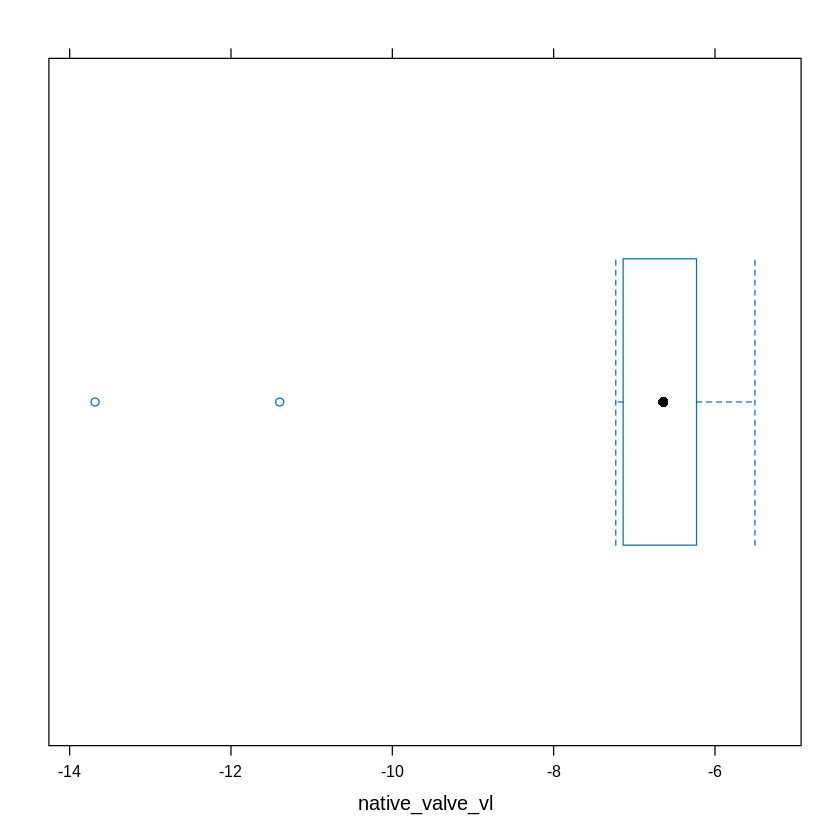

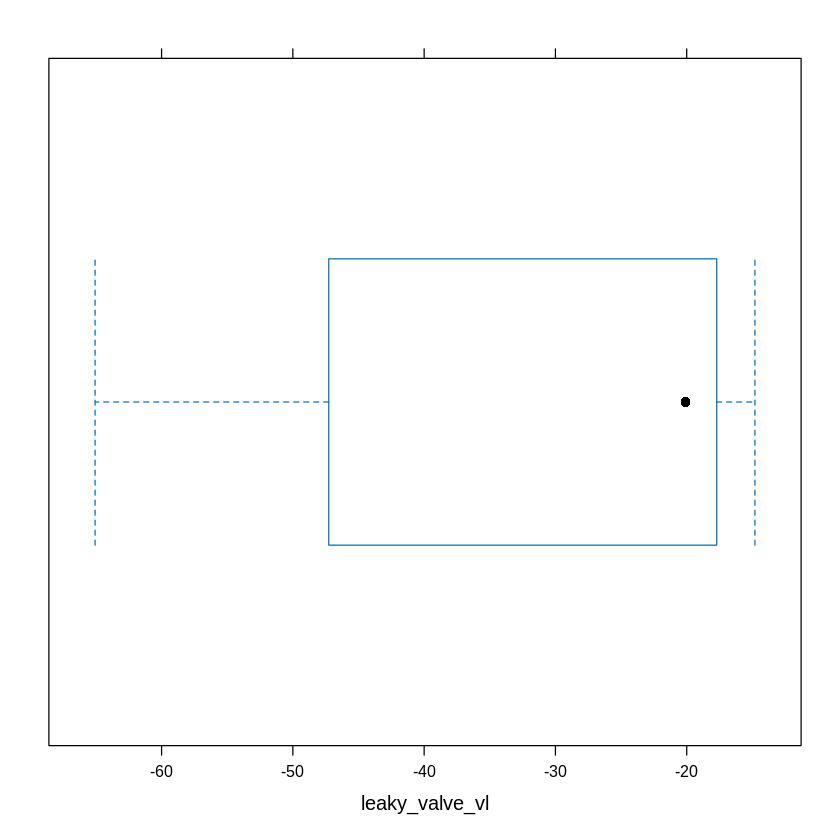

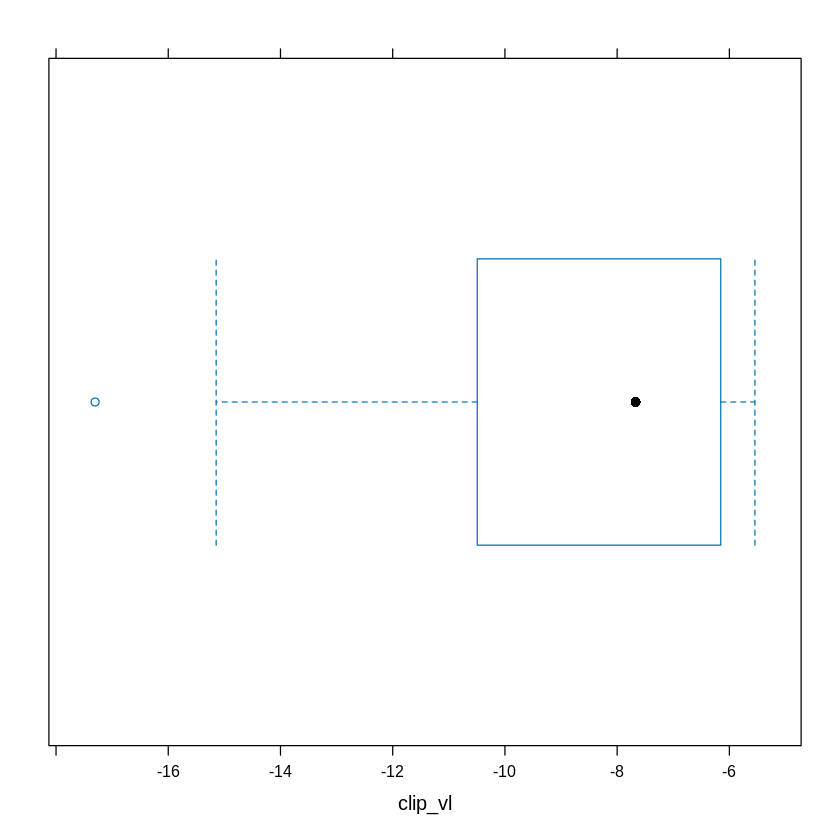

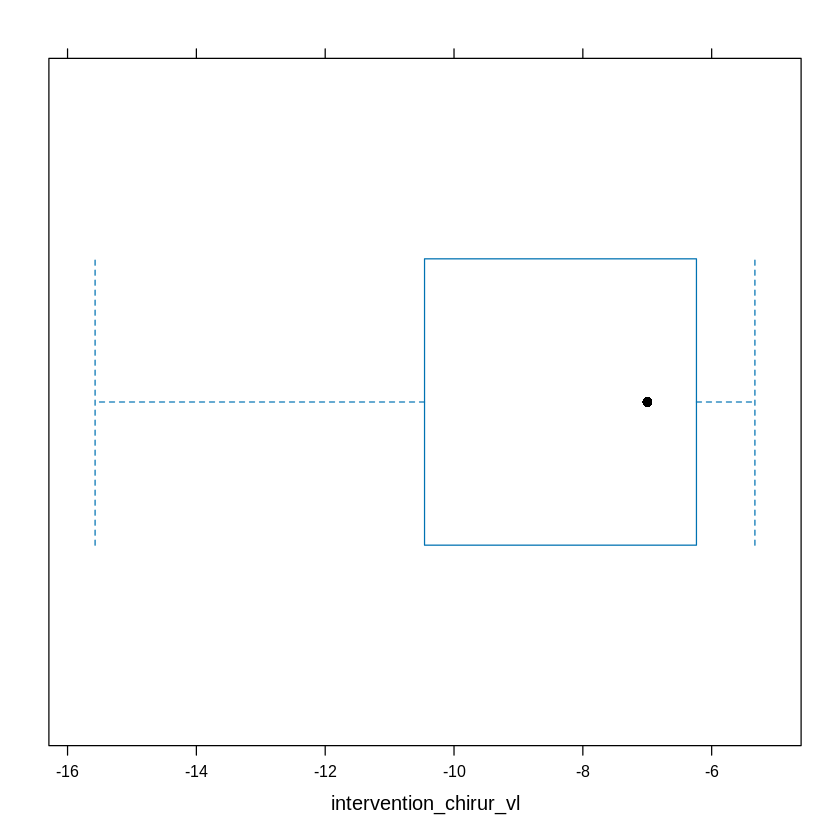

In [ ]:
bwplot(native_valve_vl)                          # Applying bwplot function
bwplot(leaky_valve_vl)                          # Applying bwplot function
bwplot(clip_vl)                          # Applying bwplot function
bwplot(intervention_chirur_vl)                          # Applying bwplot function

In [ ]:
## Ein Boxplot (auch Box-and-Whisker-Plot genannt) ist ein grafisches Darstellungstool in der Statistik, das verwendet wird, um die Verteilung und die Streuung von Daten zu visualisieren.
## Boxplots bieten eine schnelle und informative Möglichkeit, Schlüsselstatistiken über die Daten zu interpretieren.
## Die Länge der Whisker und das Vorhandensein von Ausreißern geben Aufschluss über die Streuung und mögliche Ausreißer in den Daten. Lange Whisker oder viele Ausreißer können auf eine größere Streuung hinweisen

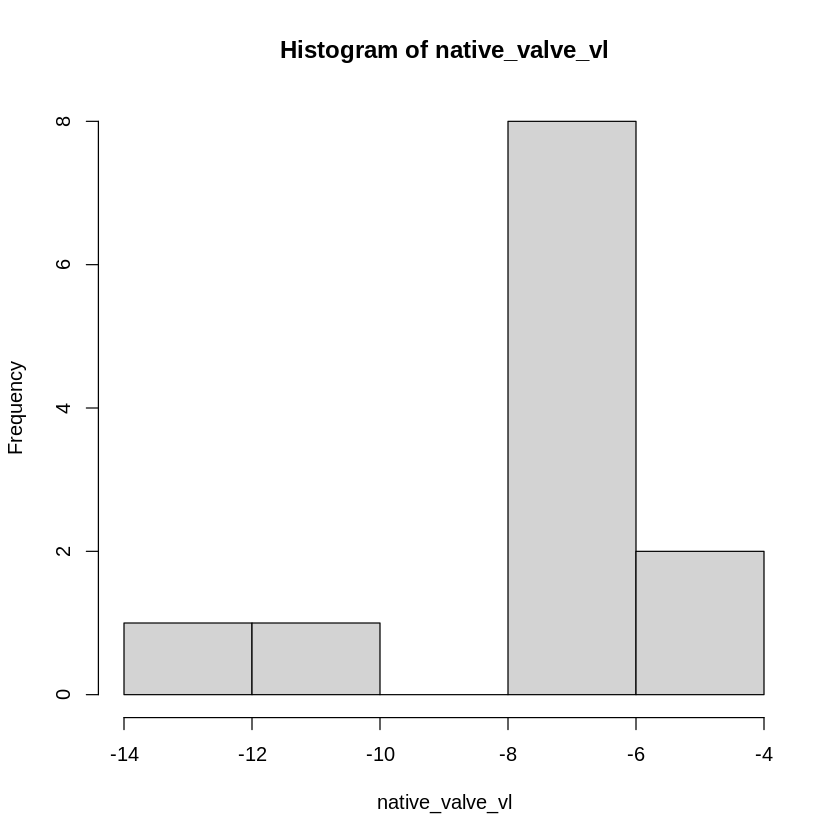

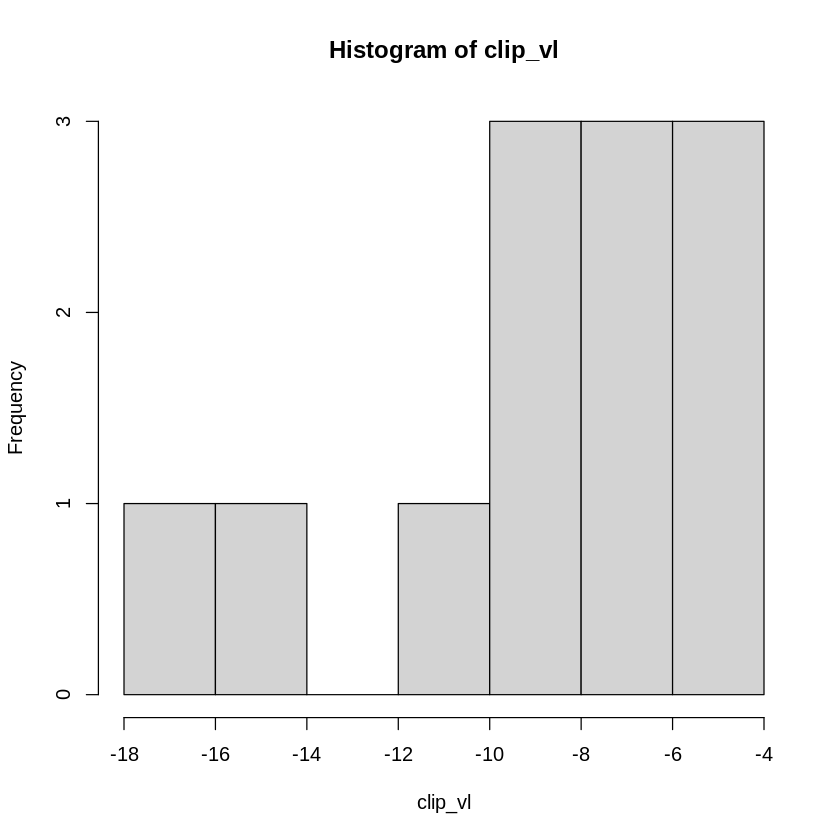

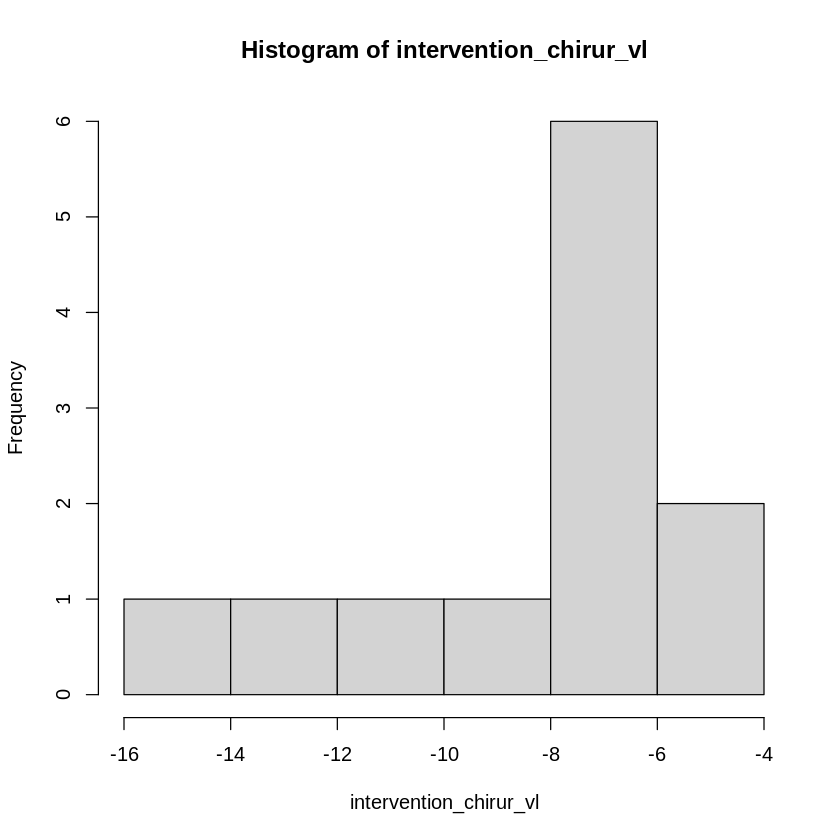

In [ ]:
# Histogramm für Native Klappe, Clip-Methode und chirurg. Eingriff der V-Leak Methode
hist(native_valve_vl)
hist(clip_vl)
hist(intervention_chirur_vl)

In [ ]:
# Histogramme zeigen die Verteilung verschiedenen Versuchszustände an
# Eine Prämisse für den T-Test ist eine Normalverteilung, also eie Konzentration um den Mittelwert, auch genannt Glockenkurve
# Da keine richtige Normalverteilung bei allen drei Versuchsvorgängen vorhanden ist, wird dieses Kriterium nicht erfüllt

In [ ]:
# Durchführung des T-Tests

In [ ]:
# Um die Aussagekraft eines T-Tests messen zu können, kann die Effektgröße gemessen sowie die Poweranalyse durchgeführt werden. Diese sagt aus, wie Aussagekräftig die Daten für den T-Test sind
# Die Effektstärke von Cohens D lässt sich hierbei folgendermaßen klassifizieren:
## Kleine Effektstärke (d ≈ 0,2): Ein Cohen's d-Wert von etwa 0,2 wird oft als "kleiner Effekt" angesehen. Dies deutet darauf hin, dass der beobachtete Unterschied zwischen den Gruppen relativ gering ist.
## Mittlere Effektstärke (d ≈ 0,5): Ein Wert von etwa 0,5 wird als "mittlere Effektstärke" betrachtet. Hierbei handelt es sich um einen moderaten Unterschied, der in vielen wissenschaftlichen Studien von Interesse ist.
## Große Effektstärke (d ≈ 0,8 oder größer): Ein Cohen's d-Wert von etwa 0,8 oder größer wird als "große Effektstärke" angesehen. Dies weist auf einen signifikanten und starken Unterschied zwischen den Gruppen hin.

In [ ]:
# Cohen's d für den Vergleich native Klappe und Clip VL
effect_size_NK_CVL <- abs((mean(native_valve_vl) - mean(clip_vl)) / sqrt(((sd(native_valve_vl)^2 + sd(clip_vl)^2) / 2)))
effect_size_NK_CVL

[1] 0.4782672

In [ ]:
# Der Wert zeigt eine mittlere Effektstärke, was bedeutet, dass es sich um einen moderaten Unterschied handelt, der in vielen wissenschaftlichen Studien von Interesse ist

In [ ]:
# als nächstes wird die Poweranalyse durchgeführt werden
# Eine Poweranalyse, auch als Stichprobenplanung oder Teststärkeanalyse bezeichnet, ist ein statistisches Verfahren, das in der Forschung verwendet wird
# um die Wahrscheinlichkeit zu bestimmen, mit der ein statistischer Test einen signifikanten Effekt nachweisen kann, falls dieser Effekt tatsächlich existiert.

# Niedrige Teststärke (Power < 0,80): Eine Teststärke von weniger als 80% wird oft als niedrig angesehen. Dies bedeutet, dass der Test eine relativ geringe Wahrscheinlichkeit hat, einen tatsächlichen Effekt zu erkennen. In solchen Fällen besteht ein höheres Risiko, dass ein signifikanter Effekt übersehen wird.
# Moderate Teststärke (Power ≈ 0,80): Eine Teststärke von etwa 80% gilt als moderat. Hier hat der Test eine anständige Wahrscheinlichkeit, einen tatsächlichen Effekt zu erkennen, aber es besteht immer noch eine gewisse Unsicherheit.
# Hohe Teststärke (Power > 0,80): Eine Teststärke von über 80% wird oft als hoch angesehen. In solchen Fällen hat der Test eine gute Wahrscheinlichkeit, einen tatsächlichen Effekt zu identifizieren. Dies ist wünschenswert, da es das Risiko eines Fehlers des zweiten Typs (das Nichterkennen eines vorhandenen Effekts) verringert.

In [ ]:
install.packages("pwr")
library(pwr)

# Definieren Sie die Parameter für die Poweranalyse
effektgroesse <- effect_size_NK_CVL # Beispielwert, ersetzen Sie ihn durch Ihre geschätzte Effektgröße
signifikanzniveau <- 0.05
stichprobengroesse <- length(native_valve_vl) # Beispielwert, ersetzen Sie ihn durch Ihre Stichprobengröße
df <- stichprobengroesse - 1
alternative <- "two.sided"

# Berechnen Sie die Macht des T-Tests
power <- pwr.t.test(d = effektgroesse, sig.level = signifikanzniveau, n = stichprobengroesse, alternative = alternative)$power

# Zeigen Sie die berechnete Power an
cat("Berechnete Power des T-Tests:", power, "\n")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Berechnete Power des T-Tests: 0.2017255 


In [ ]:
# Der Wert weist auf eine niedrige Teststärke hin, was bedeutet, das der Test eine relativ geringe Wahrscheinlichkeit hat, einen tatsächlichen Effekt zu erkennen
# Trotz der niedrigen Teststärke soll der gepaarte T-Test durchgeführt werden. Hier soll untersucht werden, inwiefern sich die Werte native_vl und die Clip Methode unterscheiden

In [ ]:
# Gepaarter Zweistichprobentest
ergebnis <- t.test(native_valve_vl, clip_vl, paired = TRUE)

# Zusammenfassung der Testergebnisse
print(ergebnis)


	Paired t-test

data:  native_valve_vl and clip_vl
t = 1.5285, df = 11, p-value = 0.1546
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -0.6811641  3.7776619
sample estimates:
mean difference 
       1.548249 



In [ ]:
# Die Ergebnisse des T-Tests lassen sich folgendermaßen Interpretieren
# T-Wert: Der T-Wert ist eine Maßzahl für den Unterschied zwischen den gepaarten Werten, bereinigt um die Stichprobenvarianz.
# Ein größerer T-Wert deutet auf einen größeren Unterschied hin.
# p-Wert: Der p-Wert gibt an, wie wahrscheinlich es ist, einen so extremen oder extremeren T-Wert zu erhalten, wenn die Nullhypothese wahr ist.
# Ein kleiner p-Wert (typischerweise kleiner als 0,05) deutet darauf hin, dass Sie die Nullhypothese ablehnen können, da es unwahrscheinlich ist, dass der beobachtete Unterschied zufällig ist.
# Nullhypothese (H0): Die Nullhypothese besagt, dass es keinen signifikanten Unterschied zwischen den beiden Bedingungen oder Zeitpunkten gibt.
# Mit anderen Worten, die mittleren Differenzen zwischen den gepaarten Werten sind null.
# Alternativhypothese (H1): Die Alternativhypothese besagt, dass es einen signifikanten Unterschied zwischen den beiden Bedingungen oder Zeitpunkten gibt.
# Dies ist die Hypothese, die Sie normalerweise bestätigen möchten.

In [ ]:
# Cohen's d für native Klappe und chirur. VL
# Beispiel für Cohen's d-Berechnung
effect_size <- abs((mean(native_valve_vl) - mean(intervention_chirur_vl)) / sqrt(((sd(native_valve_vl)^2 + sd(intervention_chirur_vl)^2) / 2)))
effect_size

[1] 0.3257218

In [ ]:
## auch hier keine große Aussagekraft

In [ ]:
install.packages("pwr")
library(pwr)

# Definieren Sie die Parameter für die Poweranalyse
effektgroesse <- effect_size # Beispielwert, ersetzen Sie ihn durch Ihre geschätzte Effektgröße
signifikanzniveau <- 0.05
stichprobengroesse <- length(native_valve_vl) # Beispielwert, ersetzen Sie ihn durch Ihre Stichprobengröße
df <- stichprobengroesse - 1
alternative <- "two.sided"

# Berechnen Sie die Macht des T-Tests
power <- pwr.t.test(d = effektgroesse, sig.level = signifikanzniveau, n = stichprobengroesse, alternative = alternative)$power

# Zeigen Sie die berechnete Power an
cat("Berechnete Power des T-Tests:", power, "\n")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Berechnete Power des T-Tests: 0.118985 


In [ ]:
# Gepaarter Zweistichprobentest
ergebnis <- t.test(native_valve_vl, intervention_chirur_vl, paired = TRUE)

# Zusammenfassung der Testergebnisse
print(ergebnis)


	Paired t-test

data:  native_valve_vl and intervention_chirur_vl
t = 0.95425, df = 11, p-value = 0.3605
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -1.226143  3.103103
sample estimates:
mean difference 
        0.93848 



In [ ]:
## unabhängiger T-Test für die beiden Versuchsgruppen um zu untersuchen, wie groß der Unterschied zwischen den beiden Messwerten ist

In [ ]:
# Cohen's d für native Klappe und chirur. VL
# Beispiel für Cohen's d-Berechnung
effect_size <- abs((mean(clip_vl) - mean(intervention_chirur_vl)) / sqrt(((sd(clip_vl)^2 + sd(intervention_chirur_vl)^2) / 2)))
effect_size

[1] 0.1714273

In [ ]:
# Der Wert wird als "kleiner Effekt" angesehen. Dies deutet darauf hin, dass der beobachtete Unterschied zwischen den Gruppen relativ gering ist.

In [ ]:
install.packages("pwr")
library(pwr)

# Definieren Sie die Parameter für die Poweranalyse
effektgroesse <- effect_size # Beispielwert, ersetzen Sie ihn durch Ihre geschätzte Effektgröße
signifikanzniveau <- 0.05
stichprobengroesse <- length(native_valve_vl) # Beispielwert, ersetzen Sie ihn durch Ihre Stichprobengröße
df <- stichprobengroesse - 1
alternative <- "two.sided"

# Berechnen Sie die Macht des T-Tests
power <- pwr.t.test(d = effektgroesse, sig.level = signifikanzniveau, n = stichprobengroesse, alternative = alternative)$power

# Zeigen Sie die berechnete Power an
cat("Berechnete Power des T-Tests:", power, "\n")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Berechnete Power des T-Tests: 0.0686993 


In [ ]:
# Der Wert weist auf eine niedrige Teststärke hin, was bedeutet, das der Test eine relativ geringe Wahrscheinlichkeit hat, einen tatsächlichen Effekt zu erkennen
# Trotz der niedrigen Teststärke soll auch hier der gepaarte T-Test durchgeführt werden. Hier soll untersucht werden, inwiefern sich die Werte native_vl und die Clip Methode unterscheiden

In [ ]:
result <- t.test(clip_vl, intervention_chirur_vl)
result


	Welch Two Sample t-test

data:  clip_vl and intervention_chirur_vl
t = -0.41991, df = 21.367, p-value = 0.6787
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.626513  2.406975
sample estimates:
mean of x mean of y 
-9.009407 -8.399638 


In [ ]:
# eine Möglichkeit, die Stichprobenzahl zu erhöhen und somit Möglicherweise genauere Testergebnisse zu erzielen, ist das sogenannte Bootstrap-Upsampling
# Beim Bootstrap-Upsampling werden zufällige Stichproben aus den vorhandenen Datenpunkten gezogen und diese dann in den Datensatz aufgenommen. Dies kann nützlich sein, um die Stichprobengröße zu erhöhen und die Varianz der Schätzungen zu reduzieren.

In [ ]:
## Annahme: Ihre ursprüngliche Stichprobe ist im Vektor "original_sample".
original_sample <- native_valve_vl

# Anzahl der Bootstrapping-Wiederholungen
num_replicates <- 100

# Leere Vektoren zum Sammeln der Bootstrapping-Stichproben
bootstrapped_samples <- list()

# Bootstrapping durchführen
for (i in 1:num_replicates) {
  # Zufällige Stichprobe mit Zurücklegen erstellen
  boot_sample <- sample(original_sample, replace = TRUE)

  # Die Bootstrapping-Stichprobe zur Liste hinzufügen
  bootstrapped_samples[[i]] <- boot_sample
}

# Zusammenführen der Bootstrapping-Stichproben, um die Stichprobengröße zu erhöhen
native_valve_vl_extended <- c(original_sample, unlist(bootstrapped_samples))
ergebnis <- paste("Neue Anzahl der Stichproben:", length(native_valve_vl_extended))
cat(ergebnis)

Neue Anzahl der Stichproben: 1212

In [ ]:
# Vergleich der Verteilung der beiden Messreihen (Vor und nach dem Bootstrap-Upsampling)
summary(native_valve_vl)

 native_valve_vl  
 Min.   :-13.685  
 1st Qu.: -7.094  
 Median : -6.641  
 Mean   : -7.461  
 3rd Qu.: -6.283  
 Max.   : -5.505  

In [ ]:
summary(native_valve_vl_extended)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-13.685  -7.230  -6.735  -7.458  -6.121  -5.505 

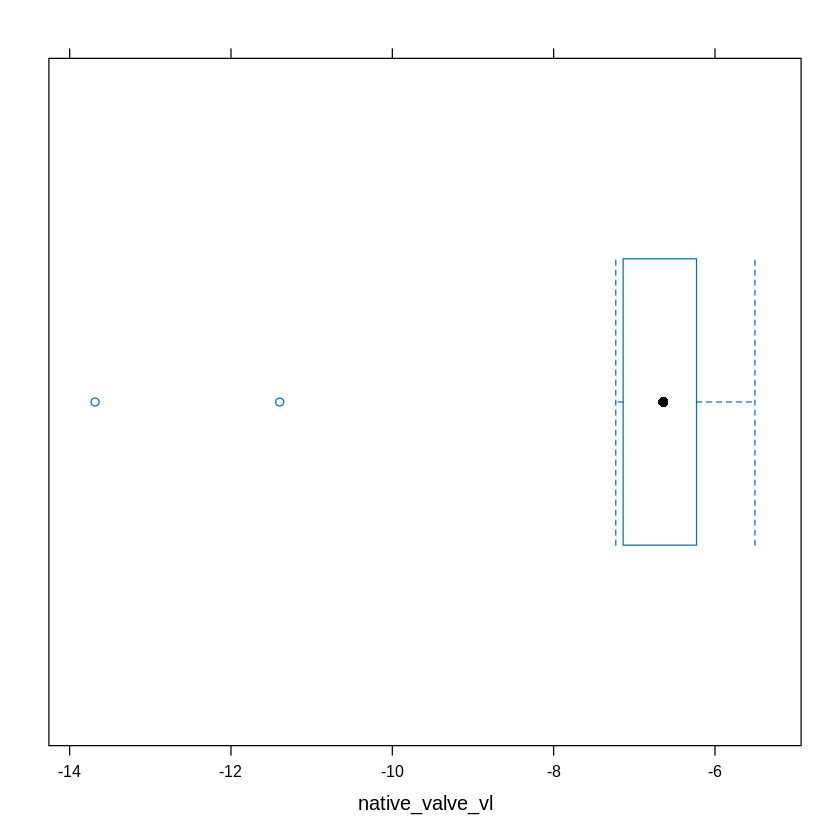

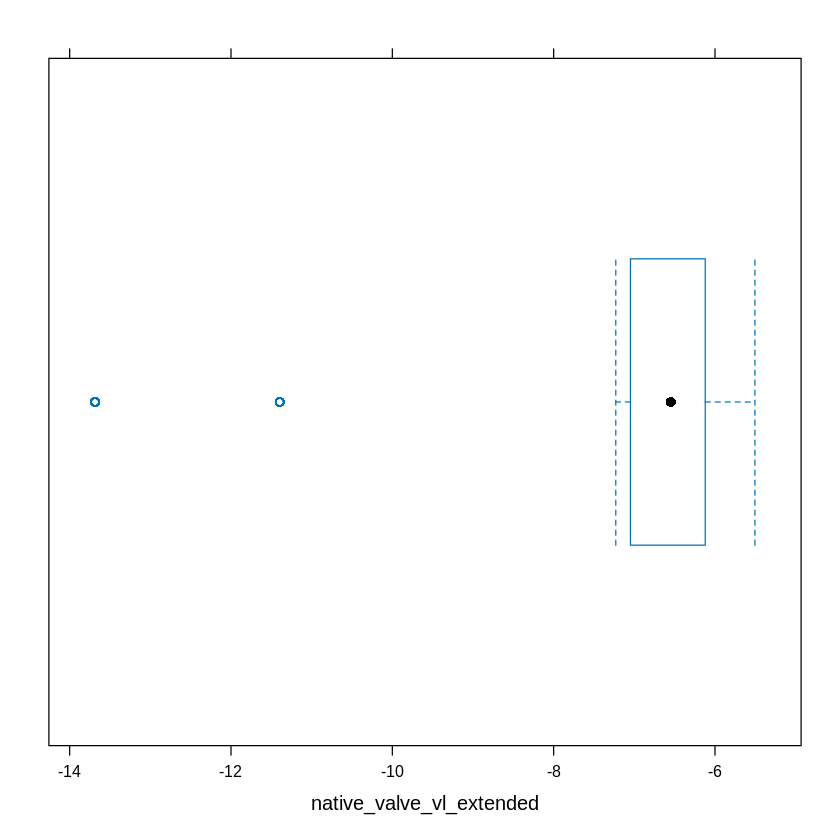

In [ ]:
bwplot(native_valve_vl)
bwplot(native_valve_vl_extended)

In [ ]:
# wie anhand der Quantils-Verteilungen sowie der Boxplots der beiden Messproben zu erkennen ist, sind die Verteilungen immernoch nahezu identisch, obwohl die Stichprobenanzahl um ein vielfaches erhöht wurde

In [ ]:
# Annahme: Ihre ursprüngliche Stichprobe ist im Vektor "original_sample".
original_sample <- clip_vl

# Anzahl der Bootstrapping-Wiederholungen
num_replicates <- 100

# Leere Vektoren zum Sammeln der Bootstrapping-Stichproben
bootstrapped_samples <- list()

# Bootstrapping durchführen
for (i in 1:num_replicates) {
  # Zufällige Stichprobe mit Zurücklegen erstellen
  boot_sample <- sample(original_sample, replace = TRUE)

  # Die Bootstrapping-Stichprobe zur Liste hinzufügen
  bootstrapped_samples[[i]] <- boot_sample
}

# Zusammenführen der Bootstrapping-Stichproben, um die Stichprobengröße zu erhöhen
clip_vl_extended <- c(original_sample, unlist(bootstrapped_samples))
length(clip_vl_extended)

[1] 1212

In [ ]:
summary(clip_vl)
summary(clip_vl_extended)

    clip_vl       
 Min.   :-17.304  
 1st Qu.:-10.211  
 Median : -7.671  
 Mean   : -9.009  
 3rd Qu.: -6.328  
 Max.   : -5.545  

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-17.304 -11.057  -8.568  -9.008  -5.806  -5.545 

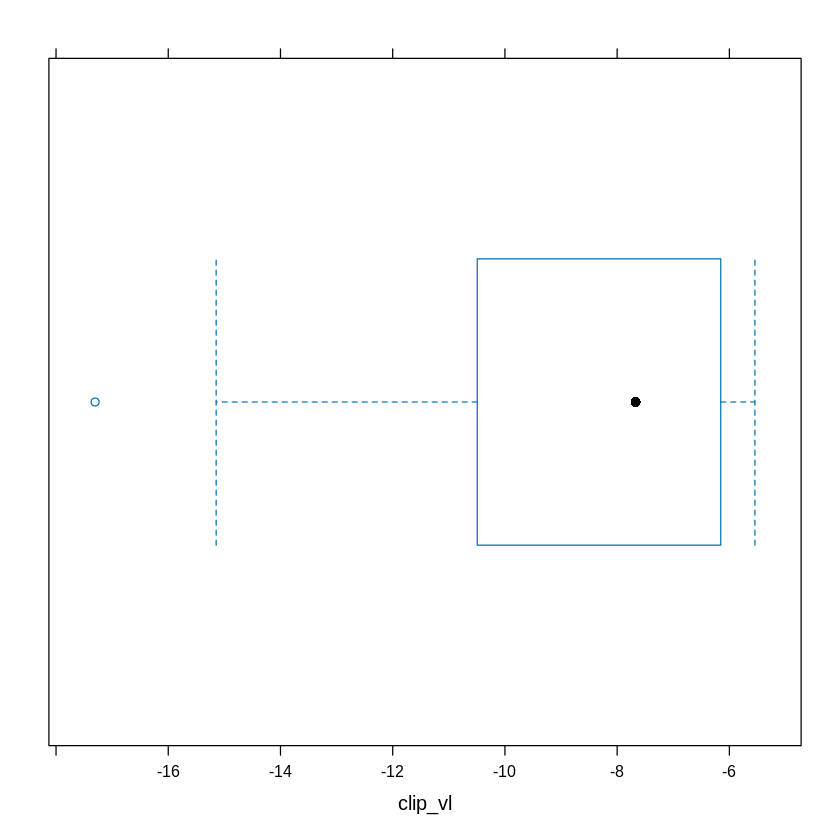

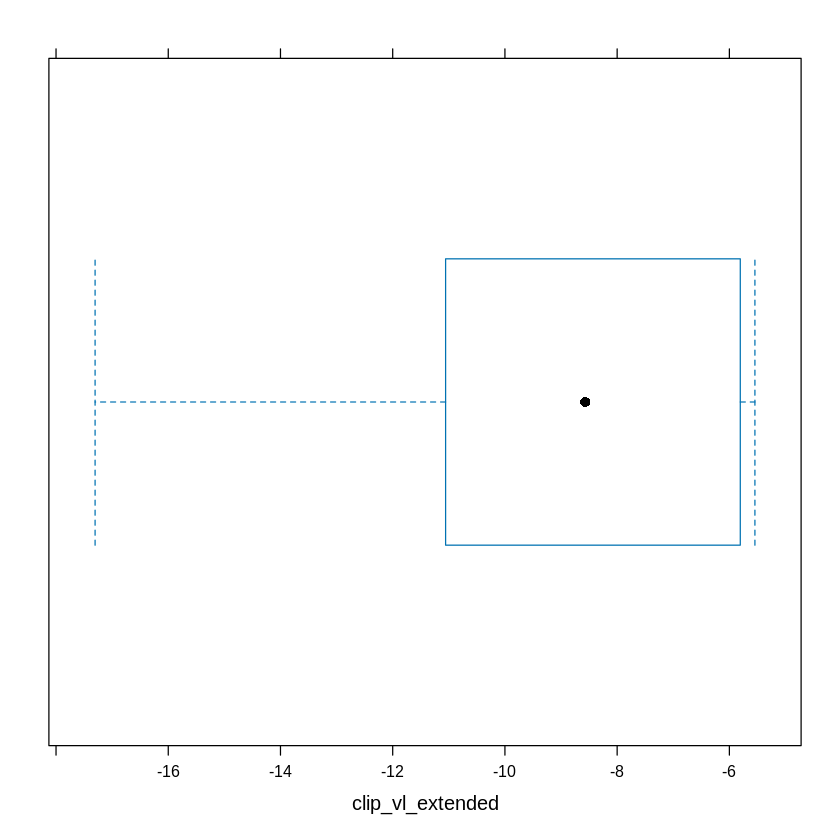

In [ ]:
bwplot(clip_vl)
bwplot(clip_vl_extended)

In [ ]:
# Auch bei das Upsampling der Clip-Methode hat keinen Unterschied zeigt keinen großen Unterschied in der Verteilung der beiden Messreihen.
# Dementsprechend werden neu aufgesetzte T-Tests mit den erweiterten Stichprobenanzahlen auch keine Unterschiede bringen

In [ ]:
# Beispiel für Cohen's d-Berechnung
effect_size_clip_extended <- abs((mean(native_valve_vl_extended) - mean(clip_vl_extended)) / sqrt(((sd(native_valve_vl_extended)^2 + sd(clip_vl_extended)^2) / 2)))
effect_size_clip_extended

[1] 0.5433505

In [ ]:
## Ein Wert von etwa 0,5 wird als "mittlere Effektstärke" betrachtet. Hierbei handelt es sich um einen moderaten Unterschied, der in vielen wissenschaftlichen Studien von Interesse ist.

In [ ]:
# Annahme: Ihre ursprüngliche Stichprobe ist im Vektor "original_sample".
original_sample <- intervention_chirur_vl

# Anzahl der Bootstrapping-Wiederholungen
num_replicates <- 100

# Leere Vektoren zum Sammeln der Bootstrapping-Stichproben
bootstrapped_samples <- list()

# Bootstrapping durchführen
for (i in 1:num_replicates) {
  # Zufällige Stichprobe mit Zurücklegen erstellen
  boot_sample <- sample(original_sample, replace = TRUE)

  # Die Bootstrapping-Stichprobe zur Liste hinzufügen
  bootstrapped_samples[[i]] <- boot_sample
}

# Zusammenführen der Bootstrapping-Stichproben, um die Stichprobengröße zu erhöhen
intervention_chirur_vl_extended <- c(original_sample, unlist(bootstrapped_samples))
length(intervention_chirur_vl_extended)


[1] 1212

In [ ]:
summary(native_valve_vl_extended)
summary(intervention_chirur_vl_extended)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-13.685  -7.230  -6.735  -7.458  -6.121  -5.505 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-15.572  -9.188  -6.428  -8.324  -6.221  -5.329 

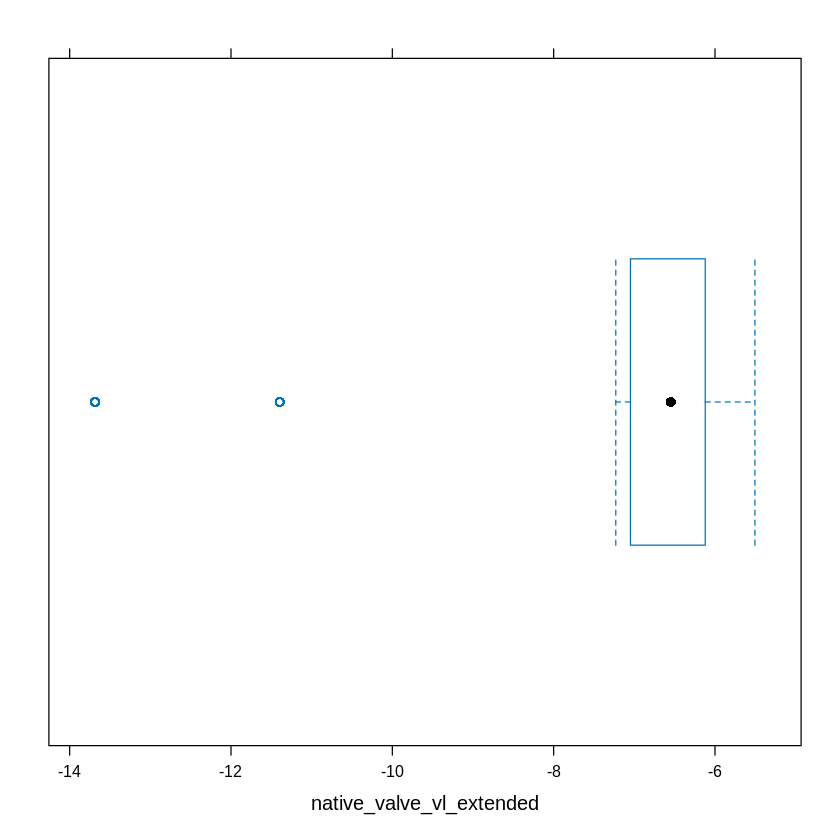

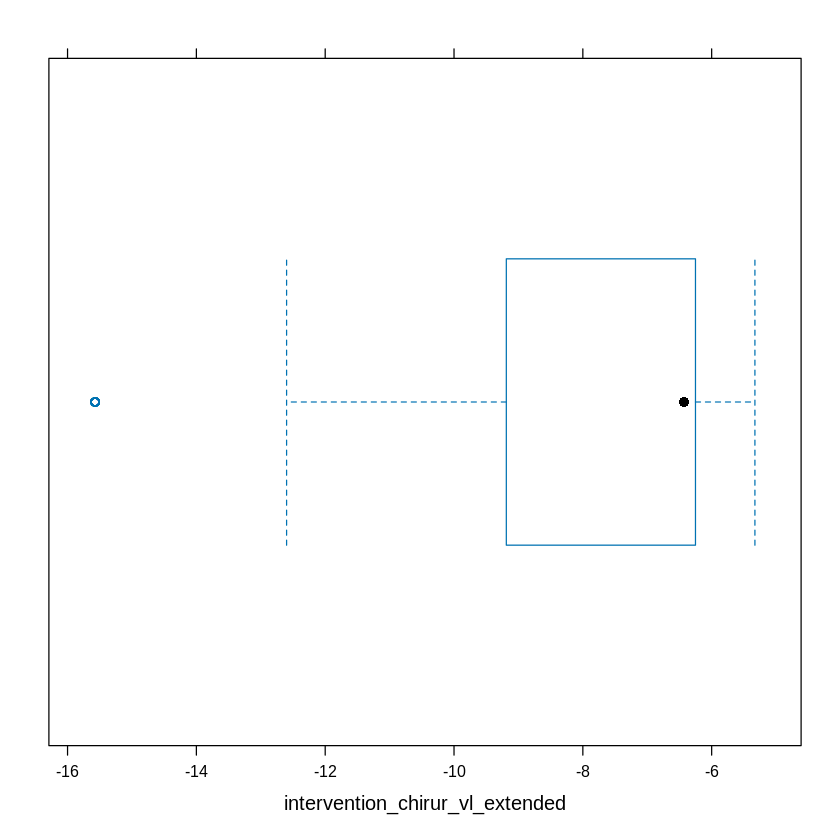

In [ ]:
bwplot(native_valve_vl_extended)
bwplot(intervention_chirur_vl_extended)

In [ ]:
# wie hier den Verteilungen zu entnehmen ist, unterscheiden sich die Verteilung etwas.

In [ ]:
# Beispiel für Cohen's d-Berechnung
effect_size_chirur_extended <- abs((mean(native_valve_vl_extended) - mean(intervention_chirur_vl_extended)) / sqrt(((sd(native_valve_vl_extended)^2 + sd(intervention_chirur_vl_extended)^2) / 2)))
effect_size_chirur_extended

[1] 0.3496474

In [ ]:
# Der Wert für Cohen's d gibt wieder eine mittlere Effetkstärke an

In [ ]:
# da Stichprobe laut Poweranalyse und Verteilungsfunktionen zu klein ist, kann in Erwägung gezogen werden, einen nicht parametrischer Test durchzuführen.
# Diese sind statistische Tests, welche genaue Ergebnisse für kleinere Stichproben geben

In [ ]:
# Ein Beispiel ist hierfür der der Wilcoxon-Test, auch bekannt als der Wilcoxon-Vorzeichen-Rang-Test
# dieser ist ein nichtparametrischer statistischer Test, der dazu verwendet wird, festzustellen, ob es einen signifikanten Unterschied zwischen zwei gepaarten oder abhängigen Stichproben gibt.
# Er wird oft angewendet, wenn die Daten nicht den Annahmen der Normalverteilung entsprechen oder wenn die Daten ordinal oder auf einer Rangskala gemessen wurden.

In [ ]:
datadiffclip <- native_valve_vl - clip_vl
datadiffclip
datadiffvleak <- native_valve_vl - intervention_chirur_vl
datadiffvleak

native_valve_vl
3.7500733
-1.4659933
-0.3152867
3.7247867
10.0742467
-2.6276200
-0.2329400
2.2315667
-1.0027867
0.0301800


native_valve_vl
0.33132000
-1.71958667
6.47846000
0.60120667
8.34275333
-4.49674667
0.83382667
1.35026667
-0.22649333
-0.09555333


In [ ]:
resultclip <- wilcox.test(datadiffclip)
resultvleak <- wilcox.test(datadiffvleak)

In [ ]:
resultclip


	Wilcoxon signed rank exact test

data:  datadiffclip
V = 51, p-value = 0.3804
alternative hypothesis: true location is not equal to 0


In [ ]:
resultvleak


	Wilcoxon signed rank exact test

data:  datadiffvleak
V = 51, p-value = 0.3804
alternative hypothesis: true location is not equal to 0


In [ ]:
# DataFrame for Gradient (mmHg)
df <- data.frame(
  column1 = numeric(0),
  column2 = numeric(0),
  column3 = numeric(0),
  column4 = numeric(0)
)

num_rows <- nrow(ausgewählte_daten)

for (i in 1:num_rows) {
  # Access values in the two columns
  value_col1 <- ausgewählte_daten[i, 1]
  value_col2 <- ausgewählte_daten[i, 3]

  # Create a data frame based on the condition
  if (value_col1 == 1) {
    new_row <- data.frame(column1 = value_col2, column2 = NA, column3 = NA, column4 = NA)
  } else if (value_col1 == 2) {
    new_row <- data.frame(column1 = NA, column2 = value_col2, column3 = NA, column4 = NA)
  } else if (value_col1 == 3) {
    new_row <- data.frame(column1 = NA, column2 = NA, column3 = value_col2, column4 = NA)
  } else {
    new_row <- data.frame(column1 = NA, column2 = NA, column3 = NA, column4 = value_col2)
  }

  # Append the new row to 'df'
  df <- rbind(df, new_row)
}

# Print the updated DataFrame
print(head(df))


   column1  column2  column3  column4
1 2.118782       NA       NA       NA
2       NA 2.241235       NA       NA
3       NA       NA 7.823207       NA
4       NA       NA       NA 3.597738
5 2.641436       NA       NA       NA
6       NA 2.616178       NA       NA


In [ ]:
# Create a DataFrame with 4 columns and 4 numeric rows
gradient <- data.frame(
  native_valve_grad = na.omit(df$column1),
  leaky_valve_grad = na.omit(df$column2),
  clip_grad = na.omit(df$column3),
  intervention_chirur_grad = na.omit(df$column4)
)

# Print the DataFrame
print(gradient)

   native_valve_grad leaky_valve_grad clip_grad intervention_chirur_grad
1           2.118782         2.241235  7.823207                 3.597738
2           2.641436         2.616178  7.187224                 4.474316
3           2.434697         2.078448  6.631390                 3.310299
4           3.438022         3.904133  5.678969                 4.595472
5           3.405066         3.530597 13.418630                 3.400363
6           3.478339         3.078427  4.491996                 4.002999
7           7.251997         6.498990 13.169301                 8.076856
8           7.337381         8.008675 19.079041                15.308238
9           6.934949         6.219099 21.120807                10.054098
10          9.031891        16.473377 19.214270                16.062186
11          7.936568         7.439893 10.422675                 8.184428
12          7.298628         6.448856 14.354621                 5.719966


In [ ]:
summary(gradient)

 native_valve_grad leaky_valve_grad   clip_grad      intervention_chirur_grad
 Min.   :2.119     Min.   : 2.078   Min.   : 4.492   Min.   : 3.310          
 1st Qu.:3.214     1st Qu.: 2.963   1st Qu.: 7.048   1st Qu.: 3.902          
 Median :5.207     Median : 5.062   Median :11.796   Median : 5.158          
 Mean   :5.276     Mean   : 5.711   Mean   :11.883   Mean   : 7.232          
 3rd Qu.:7.308     3rd Qu.: 6.734   3rd Qu.:15.536   3rd Qu.: 8.652          
 Max.   :9.032     Max.   :16.473   Max.   :21.121   Max.   :16.062          

In [ ]:
native_valve_vl_grad <- as.matrix(gradient['native_valve_grad'])
leaky_valve_vl_grad <- as.matrix(gradient['leaky_valve_grad'])
clip_vl_grad <- as.matrix(gradient['clip_grad'])
intervention_chirur_vl_grad <- as.matrix(gradient['intervention_chirur_grad'])

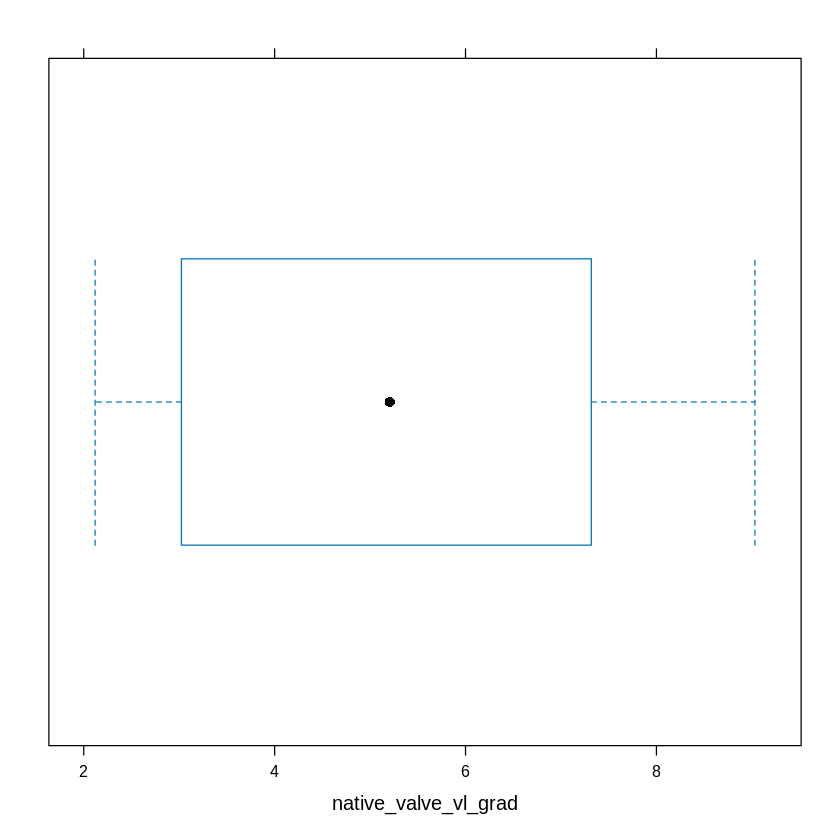

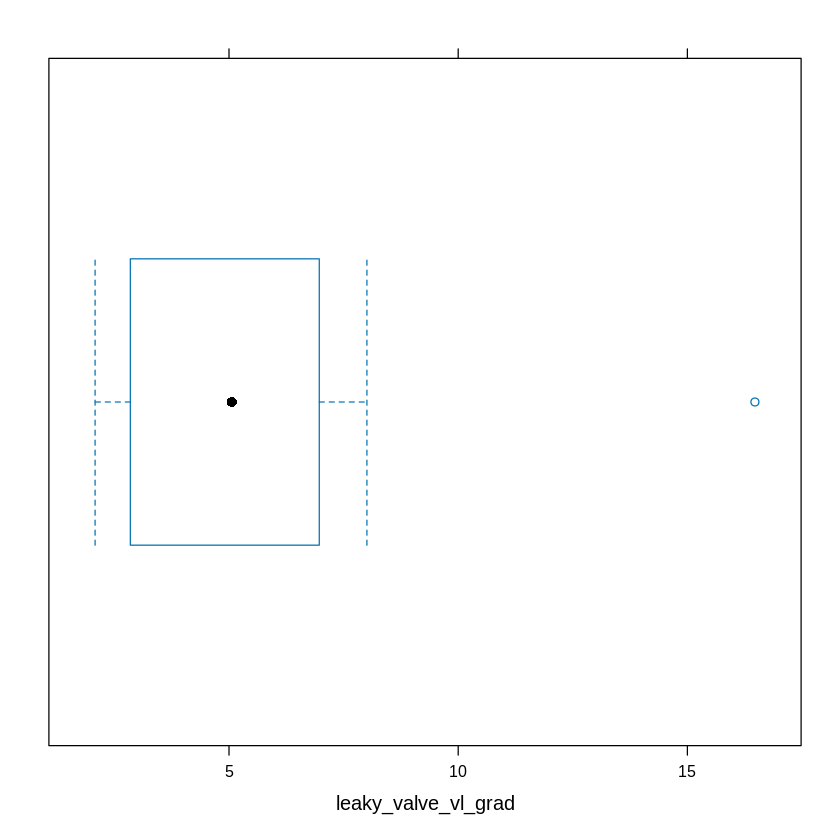

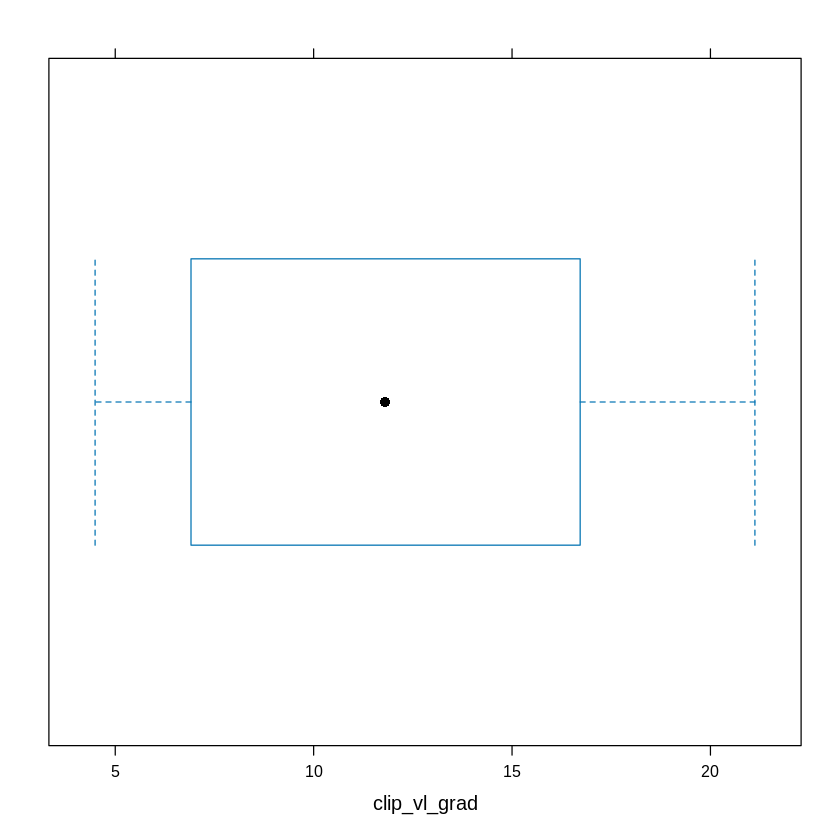

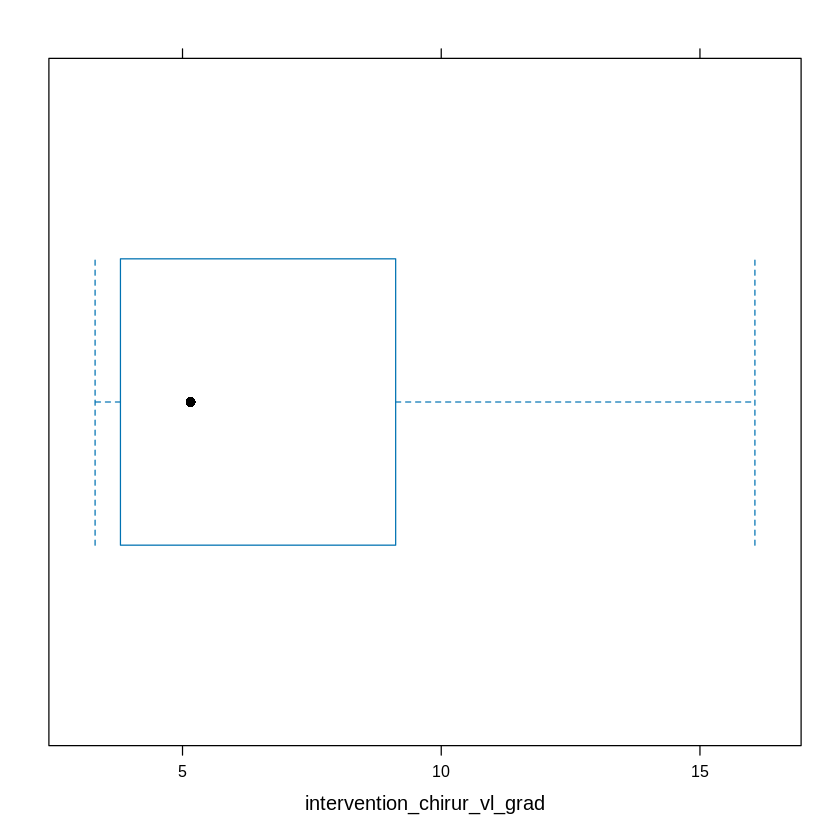

In [ ]:
bwplot(native_valve_vl_grad)                          # Applying bwplot function
bwplot(leaky_valve_vl_grad)                          # Applying bwplot function
bwplot(clip_vl_grad)                          # Applying bwplot function
bwplot(intervention_chirur_vl_grad)                          # Applying bwplot function

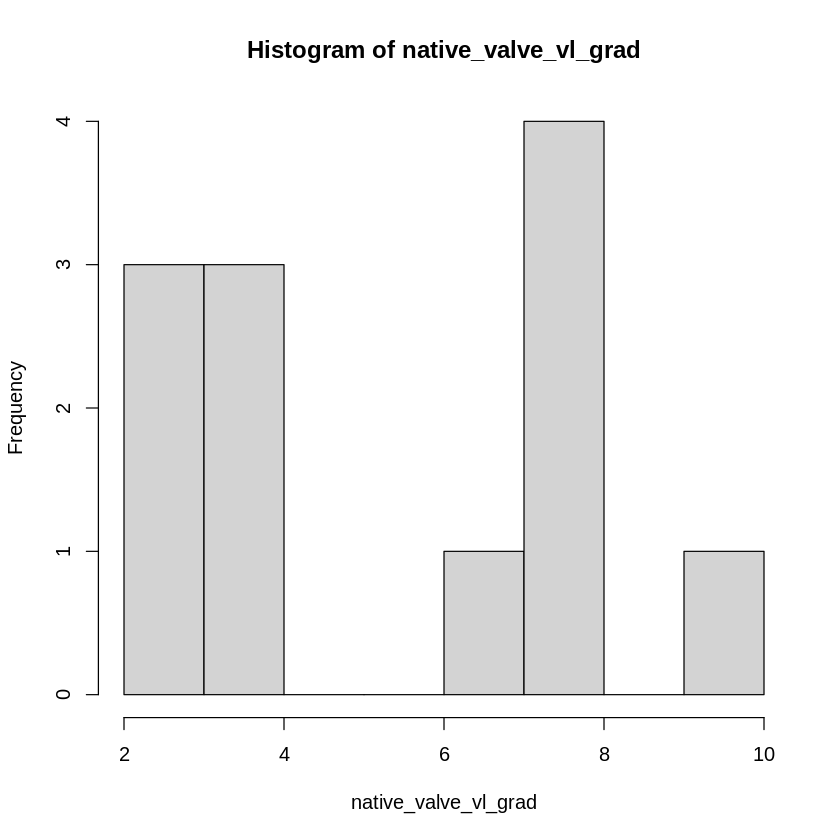

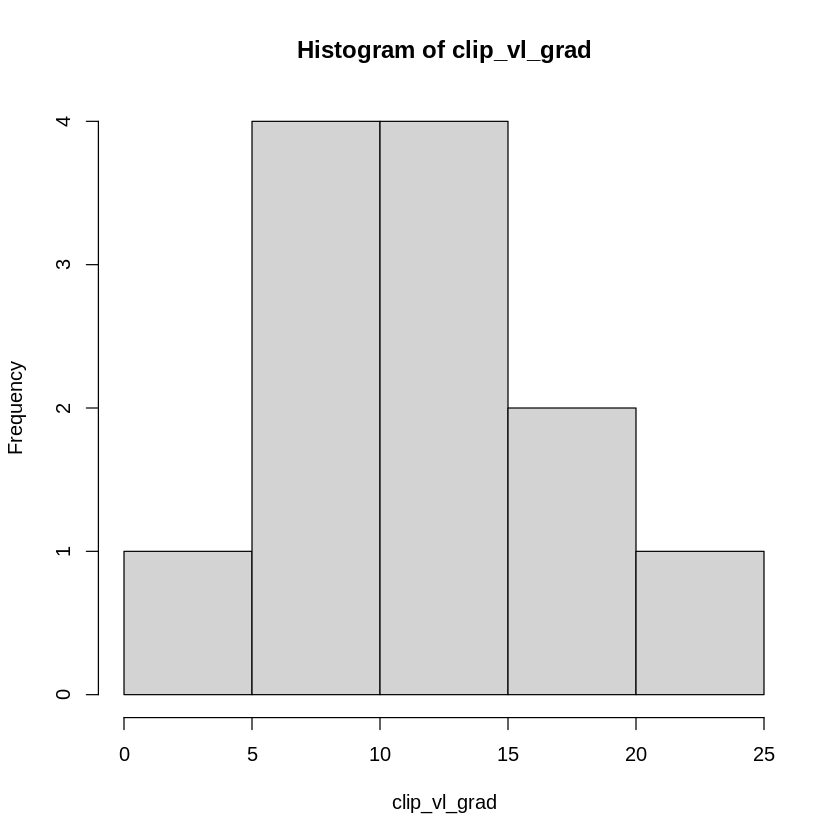

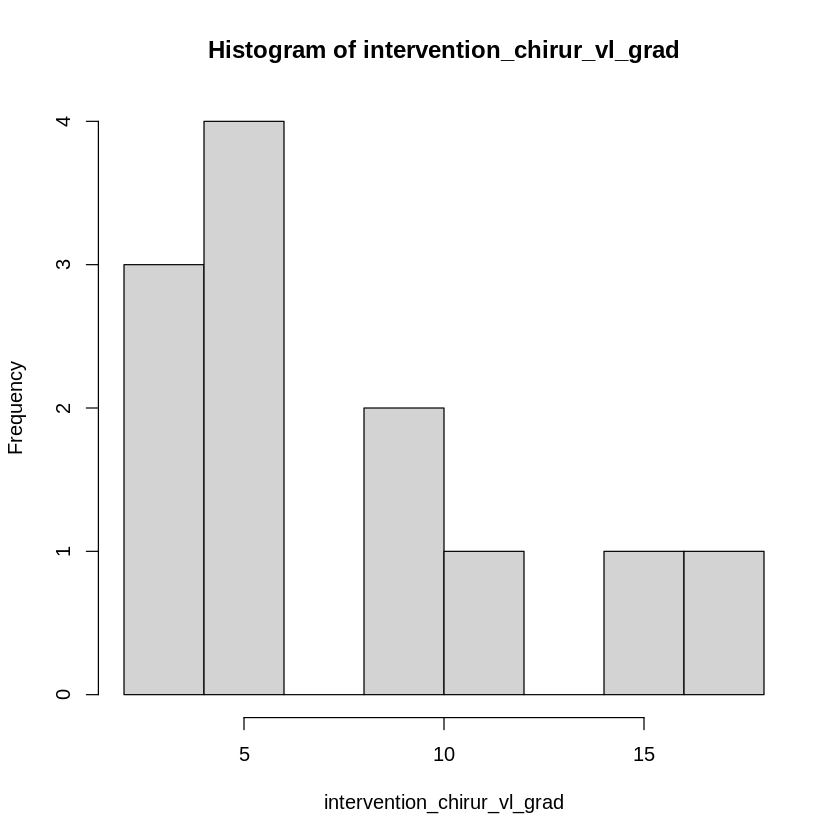

In [ ]:
# Histogramm für Native Klappe, Clip-Methode und chirurg. Eingriff der V-Leak Methode
hist(native_valve_vl_grad)
hist(clip_vl_grad)
hist(intervention_chirur_vl_grad)

In [ ]:
## Poweranalyse zum Überprüfen der Aussagestärke der Tests

In [ ]:
# Beispiel für Cohen's d-Berechnung
effect_size_clip <- abs((mean(native_valve_vl_grad) - mean(clip_vl_grad)) / sqrt(((sd(native_valve_vl_grad)^2 + sd(clip_vl_grad)^2) / 2)))
effect_size_clip

[1] 1.488198

In [ ]:
install.packages("pwr")
library(pwr)

# Definieren Sie die Parameter für die Poweranalyse
effektgroesse <- effect_size_clip # Beispielwert, ersetzen Sie ihn durch Ihre geschätzte Effektgröße
signifikanzniveau <- 0.05
stichprobengroesse <- length(native_valve_vl_grad) # Beispielwert, ersetzen Sie ihn durch Ihre Stichprobengröße
df <- stichprobengroesse - 1
alternative <- "two.sided"

# Berechnen Sie die Macht des T-Tests
power <- pwr.t.test(d = effektgroesse, sig.level = signifikanzniveau, n = stichprobengroesse, alternative = alternative)$power

# Zeigen Sie die berechnete Power an
cat("Berechnete Power des T-Tests:", power, "\n")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Berechnete Power des T-Tests: 0.9360094 


In [ ]:
# Gepaarter Zweistichprobentest
ergebnis <- t.test(native_valve_vl_grad, clip_vl_grad, paired = TRUE)

# Zusammenfassung der Testergebnisse
print(ergebnis)


	Paired t-test

data:  native_valve_vl_grad and clip_vl_grad
t = -5.55, df = 11, p-value = 0.0001728
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -9.227229 -3.986833
sample estimates:
mean difference 
      -6.607031 



In [ ]:
# Beispiel für Cohen's d-Berechnung
effect_size_grad <- abs((mean(native_valve_vl_grad) - mean(intervention_chirur_vl_grad)) / sqrt(((sd(native_valve_vl_grad)^2 + sd(intervention_chirur_vl_grad)^2) / 2)))
effect_size_grad

[1] 0.5346882

In [ ]:
install.packages("pwr")
library(pwr)

# Definieren Sie die Parameter für die Poweranalyse
effektgroesse <- effect_size_grad # Beispielwert, ersetzen Sie ihn durch Ihre geschätzte Effektgröße
signifikanzniveau <- 0.05
stichprobengroesse <- length(native_valve_vl_grad) # Beispielwert, ersetzen Sie ihn durch Ihre Stichprobengröße
df <- stichprobengroesse - 1
alternative <- "two.sided"

# Berechnen Sie die Macht des T-Tests
power <- pwr.t.test(d = effektgroesse, sig.level = signifikanzniveau, n = stichprobengroesse, alternative = alternative)$power

# Zeigen Sie die berechnete Power an
cat("Berechnete Power des T-Tests:", power, "\n")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Berechnete Power des T-Tests: 0.2404311 


In [ ]:
# Gepaarter Zweistichprobentest
ergebnis <- t.test(native_valve_vl_grad, intervention_chirur_vl_grad, paired = TRUE)

# Zusammenfassung der Testergebnisse
print(ergebnis)


	Paired t-test

data:  native_valve_vl_grad and intervention_chirur_vl_grad
t = -2.3975, df = 11, p-value = 0.03539
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -3.7527953 -0.1604053
sample estimates:
mean difference 
        -1.9566 



In [ ]:
# Annahme: Ihre ursprüngliche Stichprobe ist im Vektor "original_sample".
original_sample <- native_valve_vl_grad

# Anzahl der Bootstrapping-Wiederholungen
num_replicates <- 1000

# Leere Vektoren zum Sammeln der Bootstrapping-Stichproben
bootstrapped_samples <- list()

# Bootstrapping durchführen
for (i in 1:num_replicates) {
  # Zufällige Stichprobe mit Zurücklegen erstellen
  boot_sample <- sample(original_sample, replace = TRUE)

  # Die Bootstrapping-Stichprobe zur Liste hinzufügen
  bootstrapped_samples[[i]] <- boot_sample
}

# Zusammenführen der Bootstrapping-Stichproben, um die Stichprobengröße zu erhöhen
extended_sample1 <- c(original_sample, unlist(bootstrapped_samples))
length(extended_sample1)

[1] 12012

In [ ]:
# Annahme: Ihre ursprüngliche Stichprobe ist im Vektor "original_sample".
original_sample <- clip_vl_grad

# Anzahl der Bootstrapping-Wiederholungen
num_replicates <- 1000

# Leere Vektoren zum Sammeln der Bootstrapping-Stichproben
bootstrapped_samples <- list()

# Bootstrapping durchführen
for (i in 1:num_replicates) {
  # Zufällige Stichprobe mit Zurücklegen erstellen
  boot_sample <- sample(original_sample, replace = TRUE)

  # Die Bootstrapping-Stichprobe zur Liste hinzufügen
  bootstrapped_samples[[i]] <- boot_sample
}

# Zusammenführen der Bootstrapping-Stichproben, um die Stichprobengröße zu erhöhen
extended_sample2 <- c(original_sample, unlist(bootstrapped_samples))
length(extended_sample2)

[1] 12012

In [ ]:
# Beispiel für Cohen's d-Berechnung
effect_size <- abs((mean(native_valve_vl_grad) - mean(clip_vl_grad)) / sqrt(((sd(native_valve_vl_grad)^2 + sd(clip_vl_grad)^2) / 2)))
effect_size

[1] 1.488198

In [ ]:
install.packages("pwr")
library(pwr)

# Definieren Sie die Parameter für die Poweranalyse
effektgroesse <- effect_size # Beispielwert, ersetzen Sie ihn durch Ihre geschätzte Effektgröße
signifikanzniveau <- 0.05
stichprobengroesse <- length(native_valve_vl_grad) # Beispielwert, ersetzen Sie ihn durch Ihre Stichprobengröße
df <- stichprobengroesse - 1
alternative <- "two.sided"

# Berechnen Sie die Macht des T-Tests
power <- pwr.t.test(d = effektgroesse, sig.level = signifikanzniveau, n = stichprobengroesse, alternative = alternative)$power

# Zeigen Sie die berechnete Power an
cat("Berechnete Power des T-Tests:", power, "\n")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Berechnete Power des T-Tests: 0.9360094 


In [ ]:
datadiffgradclip <- native_valve_vl_grad - clip_vl_grad
datadiffgradclip
datadiffgradvleak <- native_valve_vl_grad - intervention_chirur_vl_grad
datadiffgradvleak

native_valve_grad
-5.704425
-4.545788
-4.196693
-2.240947
-10.013564
-1.013657
-5.917304
-11.741660
-14.185858
-10.182378


native_valve_grad
-1.478955842
-1.832880032
-0.875602146
-1.157450419
0.004702771
-0.524660139
-0.824859484
-7.970857056
-3.119148585
-7.030294923


In [ ]:
resultclip <- wilcox.test(datadiffgradclip)
resultvleak <- wilcox.test(datadiffgradvleak)

In [ ]:
resultclip
resultvleak


	Wilcoxon signed rank exact test

data:  datadiffgradclip
V = 0, p-value = 0.0004883
alternative hypothesis: true location is not equal to 0



	Wilcoxon signed rank exact test

data:  datadiffgradvleak
V = 9, p-value = 0.01611
alternative hypothesis: true location is not equal to 0
